## Customer Service Requests - EDA and Statistical Analysis

*DESCRIPTION

Perform data analysis of service request calls from New York City. Utilize data wrangling techniques to understand the pattern in the data, glean insights and perform statistical analysis to draw a few key conclusions

* * *

In [1]:
# Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset into Python environment

csr_311_data = pd.read_csv('Service_Requests_2010-Jan2016.csv')

/tmp/ipykernel_17887/314206638.py:3: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  csr_311_data = pd.read_csv('Service_Requests_2010-Jan2016.csv')


   There is DtypeWarning on columns 48 and 49.

### Understand the dataset

In [3]:
# Check dataset shape i.e. count of rows and columns present

csr_311_data.shape

(364558, 53)

   There are 3,64,558 service requests (SR) and each SR has 53 values (columns) recorded.

In [4]:
# Check Null values

csr_311_data.isna().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

Below output indicates the columns with Null values. Important observations are:
     
- Closed Date has 2381 NUll Values
- Several columns with address related variables have extremely large number of NULL values such as Landmark, School or    Citywide Complaint, Vehicle Name, Taxi Company Borough, ..., Ferry Terminal Name.
- Variables - X Coordinate (State Plane), Y Coordinate (State Plane), Latitude, Logitude, Location, all have 4030 NULL values
- All fields/features with non-zero values in the table have NUll values.

### Basic data exploratory analysis

In [5]:
# Check Dtype

csr_311_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

There are four Date related variables all of which has object data type.

In [6]:
# Check unique value count

csr_311_data.nunique()

Unique Key                        364558
Created Date                      362018
Closed Date                       339837
Agency                                 1
Agency Name                            3
Complaint Type                        24
Descriptor                            45
Location Type                         18
Incident Zip                         201
Incident Address                  126372
Street Name                         7693
Cross Street 1                      6234
Cross Street 2                      6064
Intersection Street 1               4704
Intersection Street 2               4422
Address Type                           5
City                                  53
Landmark                             120
Facility Type                          1
Status                                 4
Due Date                          362015
Resolution Description                18
Resolution Action Updated Date    340833
Community Board                       75
Borough         

This tells us the number of unique values for each variable in the dataset. Important observations are:

- There are 24 different complaint types. These complaints are mostly from 53 cities.
- There are 4 different values of status. 

In [7]:
# Explore categorical variables with up to 53 unique values. Printing categorical variables with large number of unique values
# will result in difficult to analyze output.

for i in csr_311_data.columns:
    if csr_311_data[i].nunique() > 53:  # This will ignore columns with more than 53 unique values and not print them.
        pass
    else:
        print('\n')
        print(csr_311_data[i].value_counts())



Agency
NYPD    364558
Name: count, dtype: int64


Agency Name
New York City Police Department    364548
Internal Affairs Bureau                 8
NYPD                                    2
Name: count, dtype: int64


Complaint Type
Blocked Driveway             100881
Illegal Parking               92679
Noise - Street/Sidewalk       51692
Noise - Commercial            44109
Derelict Vehicle              21661
Noise - Vehicle               19352
Animal Abuse                  10541
Traffic                        5198
Homeless Encampment            4879
Vending                        4192
Noise - Park                   4109
Drinking                       1409
Noise - House of Worship       1070
Posting Advertisement           681
Urinating in Public             641
Bike/Roller/Skate Chronic       478
Panhandling                     327
Disorderly Youth                315
Illegal Fireworks               172
Graffiti                        157
Agency Issues                     8
Squeegee   



Borough
BROOKLYN         118864
QUEENS           100766
MANHATTAN         77462
BRONX             49169
STATEN ISLAND     15339
Unspecified        2958
Name: count, dtype: int64


Park Facility Name
Unspecified                        364557
Alley Pond Park - Nature Center         1
Name: count, dtype: int64


Park Borough
BROOKLYN         118864
QUEENS           100766
MANHATTAN         77462
BRONX             49169
STATEN ISLAND     15339
Unspecified        2958
Name: count, dtype: int64


School Name
Unspecified                        364557
Alley Pond Park - Nature Center         1
Name: count, dtype: int64


School Number
Unspecified    364557
Q001                1
Name: count, dtype: int64


School Region
Unspecified    364557
Name: count, dtype: int64


School Code
Unspecified    364557
Name: count, dtype: int64


School Phone Number
Unspecified    364557
7182176034          1
Name: count, dtype: int64


School Address
Unspecified                                     364557
Gran

- The complaint type - 'Blocked Driveway' has the highest frequency of 100881 followed by Noise - Street/Sidewalk
- Brooklyn city has highest number of complaints at 118862. New York has second highest complaints
- There is only one record for School Name, Number, Code, Address, Phone Number, and other school related variables. All other records mention 'Unspecified' for these variables.
- For the variables - School or Citywide Complaint, Vehicle Type, Taxi Company Borough, Taxi Pick up Location, Garage Lot Name, all the values are NULL. That is there is no non-null value. We can simply drop these columns OR fillthese with unspecified.

In [8]:
# Missing value treatment
# There are 2997 Null values for City. Replacing these Null values with 'Unspecified'

null_index = csr_311_data[csr_311_data['City'].isna()].index
print(len(null_index))

csr_311_data['City'].fillna("Unspecified", inplace=True)

# Check if the replacement is done correctly
csr_311_data['City'].value_counts()

2997


City
BROOKLYN               118862
NEW YORK                77312
BRONX                   49171
STATEN ISLAND           15340
JAMAICA                  8932
ASTORIA                  7991
FLUSHING                 7487
RIDGEWOOD                6392
CORONA                   5383
WOODSIDE                 4357
EAST ELMHURST            3558
OZONE PARK               3446
ELMHURST                 3438
SOUTH RICHMOND HILL      3431
MASPETH                  3118
WOODHAVEN                3103
LONG ISLAND CITY         3028
Unspecified              2997
SOUTH OZONE PARK         2668
FRESH MEADOWS            2453
RICHMOND HILL            2335
MIDDLE VILLAGE           2291
QUEENS VILLAGE           2251
FOREST HILLS             2122
JACKSON HEIGHTS          2106
REGO PARK                1807
BAYSIDE                  1550
COLLEGE POINT            1544
FAR ROCKAWAY             1397
WHITESTONE               1369
HOLLIS                   1231
HOWARD BEACH             1144
SPRINGFIELD GARDENS      1094
ROSED

NOTE: Now we have 'Unspecified' as one entry with total count of 2997.

In [9]:
# Similarly, filling missing values for few other columns with 'unspecified'

csr_311_data['School or Citywide Complaint'].fillna('Unspecified', inplace=True)
csr_311_data['School or Citywide Complaint'].head()

/tmp/ipykernel_17887/1405822190.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Unspecified' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  csr_311_data['School or Citywide Complaint'].fillna('Unspecified', inplace=True)


0    Unspecified
1    Unspecified
2    Unspecified
3    Unspecified
4    Unspecified
Name: School or Citywide Complaint, dtype: object

In [10]:
# Typecast datetime variables/features as datetime type. Currently these are 'object' type in the dataframe.

from datetime import datetime as dt

csr_311_data['Created Date'] = pd.to_datetime(csr_311_data['Created Date'], infer_datetime_format=True)
print(csr_311_data['Created Date'].head())

csr_311_data['Closed Date'] = pd.to_datetime(csr_311_data['Closed Date'], infer_datetime_format=True)
print(csr_311_data['Closed Date'].head())

csr_311_data['Due Date'] = pd.to_datetime(csr_311_data['Due Date'], infer_datetime_format=True)
print(csr_311_data['Due Date'].head())

csr_311_data['Resolution Action Updated Date'] = pd.to_datetime(csr_311_data['Resolution Action Updated Date'], infer_datetime_format=True)
print(csr_311_data['Resolution Action Updated Date'].head())

/tmp/ipykernel_17887/3943703000.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  csr_311_data['Created Date'] = pd.to_datetime(csr_311_data['Created Date'], infer_datetime_format=True)
/tmp/ipykernel_17887/3943703000.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  csr_311_data['Created Date'] = pd.to_datetime(csr_311_data['Created Date'], infer_datetime_format=True)


0   2015-12-31 23:59:45
1   2015-12-31 23:59:44
2   2015-12-31 23:59:29
3   2015-12-31 23:57:46
4   2015-12-31 23:56:58
Name: Created Date, dtype: datetime64[ns]


/tmp/ipykernel_17887/3943703000.py:8: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  csr_311_data['Closed Date'] = pd.to_datetime(csr_311_data['Closed Date'], infer_datetime_format=True)
/tmp/ipykernel_17887/3943703000.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  csr_311_data['Closed Date'] = pd.to_datetime(csr_311_data['Closed Date'], infer_datetime_format=True)


0   2016-01-01 00:55:15
1   2016-01-01 01:26:57
2   2016-01-01 04:51:03
3   2016-01-01 07:43:13
4   2016-01-01 03:24:42
Name: Closed Date, dtype: datetime64[ns]


/tmp/ipykernel_17887/3943703000.py:11: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  csr_311_data['Due Date'] = pd.to_datetime(csr_311_data['Due Date'], infer_datetime_format=True)


0   2016-01-01 07:59:45
1   2016-01-01 07:59:44
2   2016-01-01 07:59:29
3   2016-01-01 07:57:46
4   2016-01-01 07:56:58
Name: Due Date, dtype: datetime64[ns]


/tmp/ipykernel_17887/3943703000.py:14: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  csr_311_data['Resolution Action Updated Date'] = pd.to_datetime(csr_311_data['Resolution Action Updated Date'], infer_datetime_format=True)
/tmp/ipykernel_17887/3943703000.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  csr_311_data['Resolution Action Updated Date'] = pd.to_datetime(csr_311_data['Resolution Action Updated Date'], infer_datetime_format=True)


0   2016-01-01 00:55:15
1   2016-01-01 01:26:57
2   2016-01-01 04:51:03
3   2016-01-01 07:43:13
4   2016-01-01 03:24:42
Name: Resolution Action Updated Date, dtype: datetime64[ns]


Above is one way to convert dataframe column to datetime using pandas to_datetime() function. This fuction uses format or infer_datetime_format to specify the string format of datetime to be converted.

There are multiple other ways to do the same as indicated below:
    
        # csr_311_data['Created Date'] = csr_311_data['Created Date'].apply(lambda _: dt.strptime(_,"%m/%d/%Y %I:%M:%S %p"))
This is 2nd way to convert a pandas dataframe/Series to datetime using datetime.strptime() function. Here we can specify the datetime format of the string which is to be converted

        # csr_311_data['Due Date'] = csr_311_data['Due Date'].astype('datetime64[ns]')
This is 3rd way to convert a pandas Series to datetime type

        # csr_311_data['Resolution Action Updated Date'] = csr_311_data['Resolution Action Updated Date'].apply(pd.to_datetime, errors='coerce')
This is 4th way to convert a DataFrame/Series to datetime format. Here we are using apply() along with pd.to_datetime

In [11]:
# Confirm original shape of the dataset is intact and only the intended columns are converted to datetime64

print(csr_311_data.shape)
print(csr_311_data.dtypes)
csr_311_data.isna().sum()

(364558, 53)
Unique Key                                 int64
Created Date                      datetime64[ns]
Closed Date                       datetime64[ns]
Agency                                    object
Agency Name                               object
Complaint Type                            object
Descriptor                                object
Location Type                             object
Incident Zip                             float64
Incident Address                          object
Street Name                               object
Cross Street 1                            object
Cross Street 2                            object
Intersection Street 1                     object
Intersection Street 2                     object
Address Type                              object
City                                      object
Landmark                                  object
Facility Type                             object
Status                                    object
Due Dat

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                   0
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [12]:
# Check for any inconsistences in the timeline
# Ideally 'Closed Date' or 'Resolution Action Updated Date' < 'Created Date'

print(csr_311_data[csr_311_data['Closed Date'] < csr_311_data['Created Date']].shape)
print(csr_311_data[csr_311_data['Resolution Action Updated Date'] < csr_311_data['Created Date']].shape)

(0, 53)
(5, 53)


There are 5 records/ service requests where Resolution Action Updated Date is before the request has been created.

In [13]:
# The 5 rows are displayed using below code:

csr_311_data[csr_311_data['Resolution Action Updated Date'] < csr_311_data['Created Date']].loc[:,['Unique Key', 'Created Date', 'Closed Date', 'Due Date', 'Resolution Action Updated Date']]

,Unique Key,Created Date,Closed Date,Due Date,Resolution Action Updated Date
61086,31880851,2015-11-01 01:57:24,NaT,2015-11-01 09:57:24,2015-11-01 01:00:44
61095,31886638,2015-11-01 01:54:37,NaT,2015-11-01 09:54:37,2015-11-01 01:02:57
61098,31884397,2015-11-01 01:53:10,NaT,2015-11-01 09:53:10,2015-11-01 01:33:17
61111,31884894,2015-11-01 01:46:36,NaT,2015-11-01 09:46:36,2015-11-01 01:22:04
61119,31885698,2015-11-01 01:43:18,NaT,2015-11-01 09:43:18,2015-11-01 01:22:06


In [14]:
# Droping records with inconsistent timeline

fil = csr_311_data[csr_311_data['Resolution Action Updated Date'] < csr_311_data['Created Date']].index
csr_311_data.drop(index=fil, axis=1, inplace=True)
csr_311_data.shape

(364553, 53)

5 rows have been deteled (364553 from earlier 364558) and all columns are intact

#### Draw a frequency plot for city-wise complaints

In [15]:
# Multiple cities have their names present in differnt case letters i.e. incosistent names. Correcting these inconsistencies.

csr_311_data['City'] = csr_311_data['City'].str.upper()
csr_311_data['City'].nunique()

49

The number of unique cities reduced from 53 to 49

### Charting as part of EDA

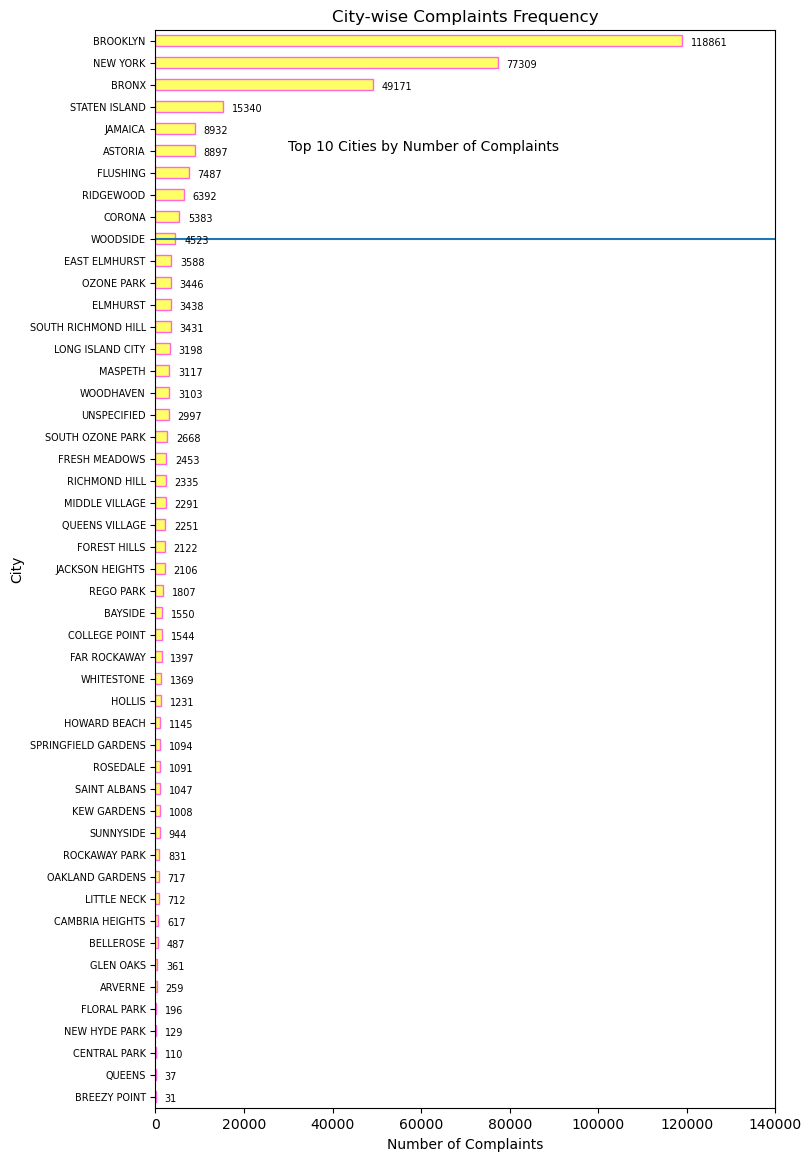

In [16]:
# Plotting city wise count of service requests/complaints. Identifying top 10 cities by number of Complaints

plt.style.use('default')
plt.figure(figsize=(8,14))
csr_311_data['City'].value_counts()[::-1].plot(kind='barh', color='yellow', ec='magenta', alpha=0.6)
for index, value in enumerate(csr_311_data['City'].value_counts()[::-1]):
    plt.text(value+2000, index - 0.2, str(value), fontsize=7)
plt.axhline(len(csr_311_data['City'].unique())-10)
plt.annotate('Top 10 Cities by Number of Complaints', xy=(30000,len(csr_311_data['City'].unique())-6))
plt.xlabel('Number of Complaints')
plt.xlim(0, 140000)
plt.yticks(fontsize = 7)
plt.title('City-wise Complaints Frequency')
plt.show()

Clearly city of Brooklyn received total 118,861 - the highest number of complaints followed by New York (77309), and Bronx(49171) respectively.

In [17]:
# Plotting complaint concentration across Brooklyn
# Before plotting, filtering the dataframe for City == "Brooklyn'

csr_311_Brooklyn_data = csr_311_data[csr_311_data['City']=='Brooklyn'.upper()]  
# Note - .upper() as BROOKLYN is in Capital letter in the dataframe.

csr_311_Brooklyn_data.shape

(118861, 53)

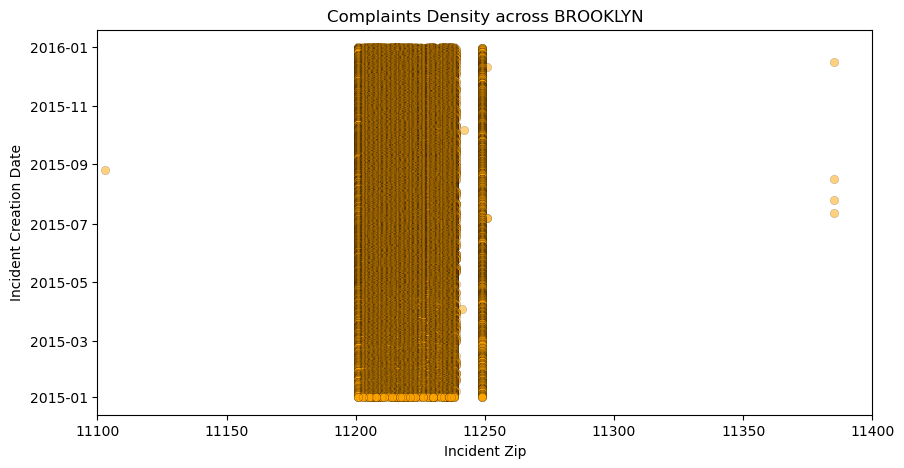

In [18]:
# Plotting scatter chart between different Incident Zip and Incident Creation Dates to show complaint concentration

plt.figure(figsize=(10,5))
plt.scatter(x=csr_311_Brooklyn_data['Incident Zip'],y=csr_311_Brooklyn_data['Created Date'], c='orange', alpha=0.5, ec='black', lw=0.2)
plt.xlabel('Incident Zip')
plt.xlim(11100, 11400)
plt.ylabel('Incident Creation Date')
plt.title('Complaints Density across BROOKLYN')
plt.show()

This is an interesting scatter plot. It clearly highlights the problem with scatter charts. There are both a very large number of data points (118861) as well as very few unique Incident Zip codes across which these data points are to be plotted. This is resulting in overplotting to an extent where scatter plot is appearing like one column/bar. This probem of overplotting is addressed by to great extent by Hexbin plot. Using the Hexbin plot we can, at least, see where the variable density is highest to lowest etc.

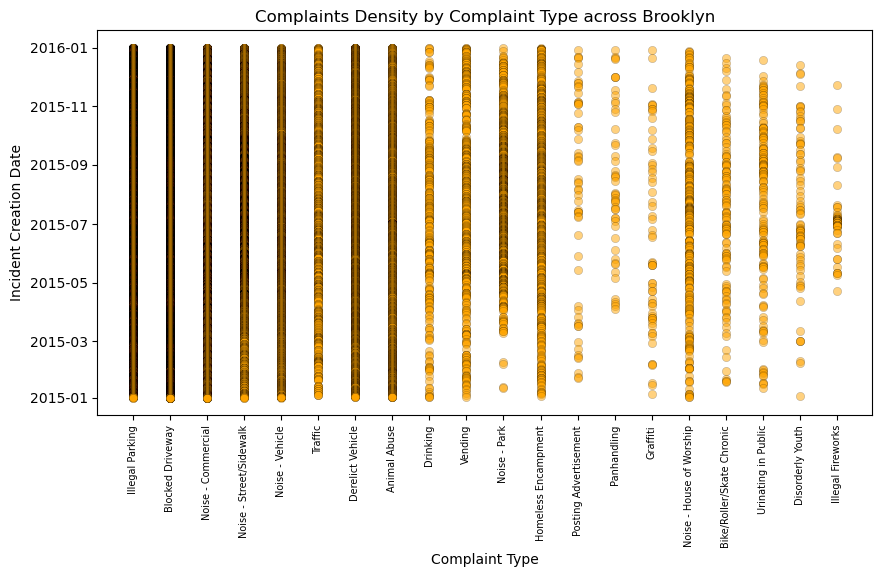

In [19]:
# Scatter chart between different Complaint Type and Incident Creation Dates for Brooklyn.

plt.figure(figsize=(10,5))
plt.scatter(x=csr_311_Brooklyn_data['Complaint Type'],y=csr_311_Brooklyn_data['Created Date'], c='orange', alpha=0.5, ec='black', lw=0.2)
plt.xlabel('Complaint Type')
plt.xticks(fontsize = 7, rotation = 90)
plt.ylabel('Incident Creation Date')
plt.title('Complaints Density by Complaint Type across Brooklyn')
plt.show()

   This is an improvement over earlier scatter plot however still there is significant overlapping of data points

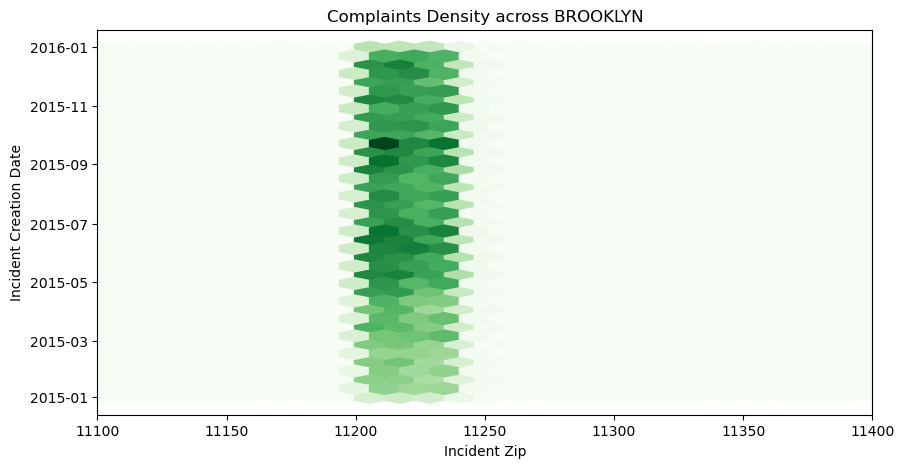

In [20]:
# Plotting a Hexbin chart to tackle the overplotting.

import pylab as pl

plt.figure(figsize=(10,5))
plt.hexbin(x=csr_311_Brooklyn_data['Incident Zip'],y=pl.date2num(csr_311_Brooklyn_data['Created Date']), gridsize=(120,20), cmap='Greens')

# pl.date2num() converts the date to a number and helps create Hexbin plot. OTHERWISE using datetime is throwing error -
# OverFlowError: int too big to convert

ax = plt.gca()  # Get current axes instance from the current plot
ax.yaxis_date()
ax.yaxis.major.formatter.scaled[1.0] = "%Y-%m-%d"

# Above three lines of code set the yaxis ticks in date format. OTHERWISE numbers will be displayed as converted by pl.date2num

plt.xlim(11100, 11400)
plt.xlabel('Incident Zip')
plt.ylabel('Incident Creation Date')
# plt.yticks(csr_311_Brooklyn_data['Created Date'], fontsize=7)
plt.title('Complaints Density across BROOKLYN')
plt.show()

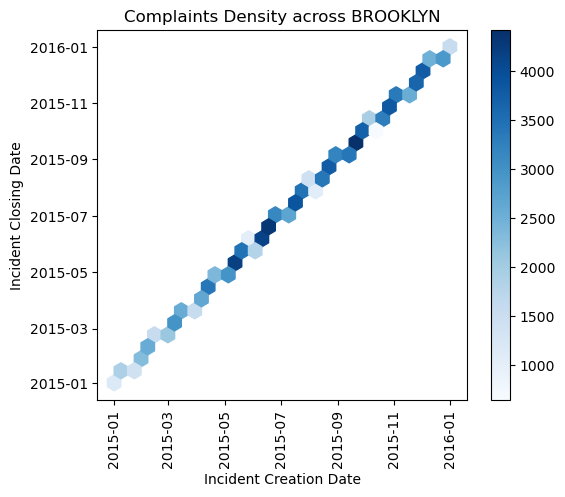

In [21]:
# Similarly plotting Hexbin chart between different Incident created Date and Closed Date. NOTE the use of pl.date2num()

ax = plt.gca()
ax.set_aspect('equal')
hb = ax.hexbin(x=pl.date2num(csr_311_Brooklyn_data['Created Date']), y=pl.date2num(csr_311_Brooklyn_data['Closed Date']), gridsize=25, cmap='Blues', mincnt=500)
ax.xaxis_date()
ax.yaxis_date()
ax.xaxis.major.formatter.scaled[1.0] = '%Y-%m-%d'
ax.yaxis.major.formatter.scaled[1.0] = '%Y-%m-%d'

plt.xlabel('Incident Creation Date')
plt.xticks(rotation = 90)
plt.ylabel('Incident Closing Date')
plt.title('Complaints Density across BROOKLYN')
plt.colorbar(hb)  # Display the colourbar on right

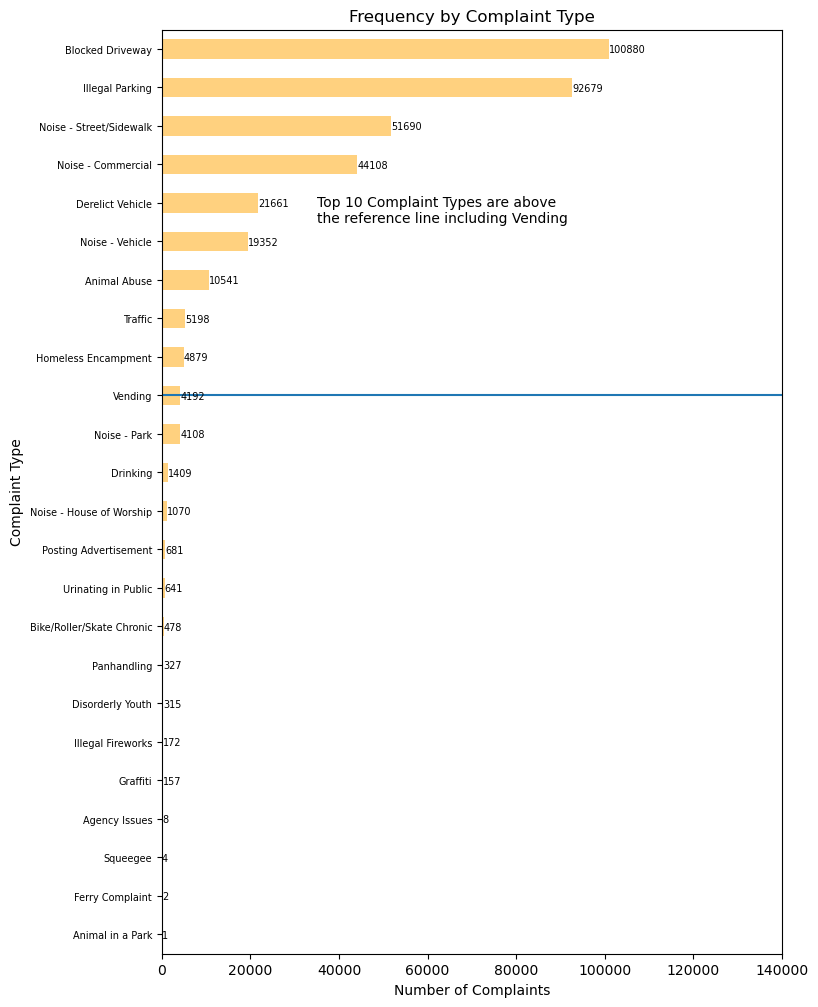

In [22]:
# Plotting bar graph of count vs. complaint types

plt.figure(figsize=(8,12))
csr_311_data['Complaint Type'].value_counts()[::-1].plot(kind='barh', alpha=0.5, color='Orange')
for index, value in enumerate(csr_311_data['Complaint Type'].value_counts()[::-1]):
    plt.text(value, index-0.1, str(value), fontsize=7)
plt.xlabel('Number of Complaints')
plt.xlim(0, 140000)
plt.yticks(fontsize = 7)
plt.title('Frequency by Complaint Type')
plt.axhline(y=14)  # Note there are total 24 complaint types. Reference line location for top 10 (y= 24-10 = 14)
plt.annotate('Top 10 Complaint Types are above\nthe reference line including Vending', xy=(35000,18.5), fontsize=10)
plt.show()

   Clearly the highest number of complaints are for Blocked Driveway (100,880). The top 10 type of complaints include all bars from Blocked Driveway to Vending

In [23]:
# Reporting complaint type count by city

citywise_complaint_type = csr_311_data.pivot_table(values='Unique Key',index='City',columns='Complaint Type',aggfunc='count')
citywise_complaint_type

Complaint Type,Agency Issues,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Ferry Complaint,Graffiti,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,NaN,46.0,NaN,NaN,50.0,32.0,2.0,1.0,NaN,1.0,...,14.0,2.0,29.0,10.0,1.0,NaN,NaN,1.0,1.0,1.0
ASTORIA,NaN,170.0,NaN,16.0,3595.0,440.0,5.0,43.0,NaN,4.0,...,21.0,64.0,554.0,236.0,2.0,3.0,NaN,60.0,10.0,57.0
BAYSIDE,NaN,53.0,NaN,NaN,514.0,231.0,2.0,1.0,NaN,3.0,...,3.0,4.0,17.0,24.0,NaN,NaN,NaN,9.0,NaN,2.0
BELLEROSE,NaN,15.0,NaN,1.0,138.0,120.0,2.0,1.0,NaN,NaN,...,1.0,1.0,13.0,11.0,1.0,1.0,NaN,9.0,1.0,NaN
BREEZY POINT,NaN,2.0,NaN,NaN,3.0,3.0,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
BRONX,NaN,1971.0,NaN,22.0,17063.0,2403.0,66.0,206.0,NaN,15.0,...,90.0,548.0,9146.0,3556.0,20.0,18.0,NaN,427.0,54.0,433.0
BROOKLYN,NaN,3191.0,NaN,124.0,36446.0,6259.0,79.0,291.0,NaN,60.0,...,389.0,1575.0,13984.0,5966.0,49.0,58.0,NaN,1258.0,155.0,575.0
CAMBRIA HEIGHTS,NaN,15.0,NaN,NaN,177.0,148.0,NaN,NaN,NaN,NaN,...,2.0,NaN,29.0,100.0,NaN,NaN,NaN,7.0,NaN,NaN
CENTRAL PARK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Same result can also be obtained by using groupby() as below

csr_311_data[['Unique Key','City','Complaint Type']].groupby(by=['City', 'Complaint Type']).size().unstack()

Complaint Type,Agency Issues,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Ferry Complaint,Graffiti,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,NaN,46.0,NaN,NaN,50.0,32.0,2.0,1.0,NaN,1.0,...,14.0,2.0,29.0,10.0,1.0,NaN,NaN,1.0,1.0,1.0
ASTORIA,NaN,170.0,NaN,16.0,3595.0,440.0,5.0,43.0,NaN,4.0,...,21.0,64.0,554.0,236.0,2.0,3.0,NaN,60.0,10.0,57.0
BAYSIDE,NaN,53.0,NaN,NaN,514.0,231.0,2.0,1.0,NaN,3.0,...,3.0,4.0,17.0,24.0,NaN,NaN,NaN,9.0,NaN,2.0
BELLEROSE,NaN,15.0,NaN,1.0,138.0,120.0,2.0,1.0,NaN,NaN,...,1.0,1.0,13.0,11.0,1.0,1.0,NaN,9.0,1.0,NaN
BREEZY POINT,NaN,2.0,NaN,NaN,3.0,3.0,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
BRONX,NaN,1971.0,NaN,22.0,17063.0,2403.0,66.0,206.0,NaN,15.0,...,90.0,548.0,9146.0,3556.0,20.0,18.0,NaN,427.0,54.0,433.0
BROOKLYN,NaN,3191.0,NaN,124.0,36446.0,6259.0,79.0,291.0,NaN,60.0,...,389.0,1575.0,13984.0,5966.0,49.0,58.0,NaN,1258.0,155.0,575.0
CAMBRIA HEIGHTS,NaN,15.0,NaN,NaN,177.0,148.0,NaN,NaN,NaN,NaN,...,2.0,NaN,29.0,100.0,NaN,NaN,NaN,7.0,NaN,NaN
CENTRAL PARK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


   There are several NaN values in the output table indicating no complaints under that complain type was received in the respective cities. 

In [25]:
# Replacing NaNs with Zero

citywise_complaint_type.fillna(0, inplace=True)
citywise_complaint_type.isna().sum()

Complaint Type
Agency Issues                0
Animal Abuse                 0
Animal in a Park             0
Bike/Roller/Skate Chronic    0
Blocked Driveway             0
Derelict Vehicle             0
Disorderly Youth             0
Drinking                     0
Ferry Complaint              0
Graffiti                     0
Homeless Encampment          0
Illegal Fireworks            0
Illegal Parking              0
Noise - Commercial           0
Noise - House of Worship     0
Noise - Park                 0
Noise - Street/Sidewalk      0
Noise - Vehicle              0
Panhandling                  0
Posting Advertisement        0
Squeegee                     0
Traffic                      0
Urinating in Public          0
Vending                      0
dtype: int64

   All NaN values are repalced with Zero

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5]),
 [Text(0, 0.5, 'Agency Issues'),
  Text(0, 1.5, 'Animal Abuse'),
  Text(0, 2.5, 'Animal in a Park'),
  Text(0, 3.5, 'Bike/Roller/Skate Chronic'),
  Text(0, 4.5, 'Blocked Driveway'),
  Text(0, 5.5, 'Derelict Vehicle'),
  Text(0, 6.5, 'Disorderly Youth'),
  Text(0, 7.5, 'Drinking'),
  Text(0, 8.5, 'Ferry Complaint'),
  Text(0, 9.5, 'Graffiti'),
  Text(0, 10.5, 'Homeless Encampment'),
  Text(0, 11.5, 'Illegal Fireworks'),
  Text(0, 12.5, 'Illegal Parking'),
  Text(0, 13.5, 'Noise - Commercial'),
  Text(0, 14.5, 'Noise - House of Worship'),
  Text(0, 15.5, 'Noise - Park'),
  Text(0, 16.5, 'Noise - Street/Sidewalk'),
  Text(0, 17.5, 'Noise - Vehicle'),
  Text(0, 18.5, 'Panhandling'),
  Text(0, 19.5, 'Posting Advertisement'),
  Text(0, 20.5, 'Squeegee'),
  Text(0, 21.5, 'Traffic'),
  Text(0, 22.5, 'Urinating in Public'),
  T

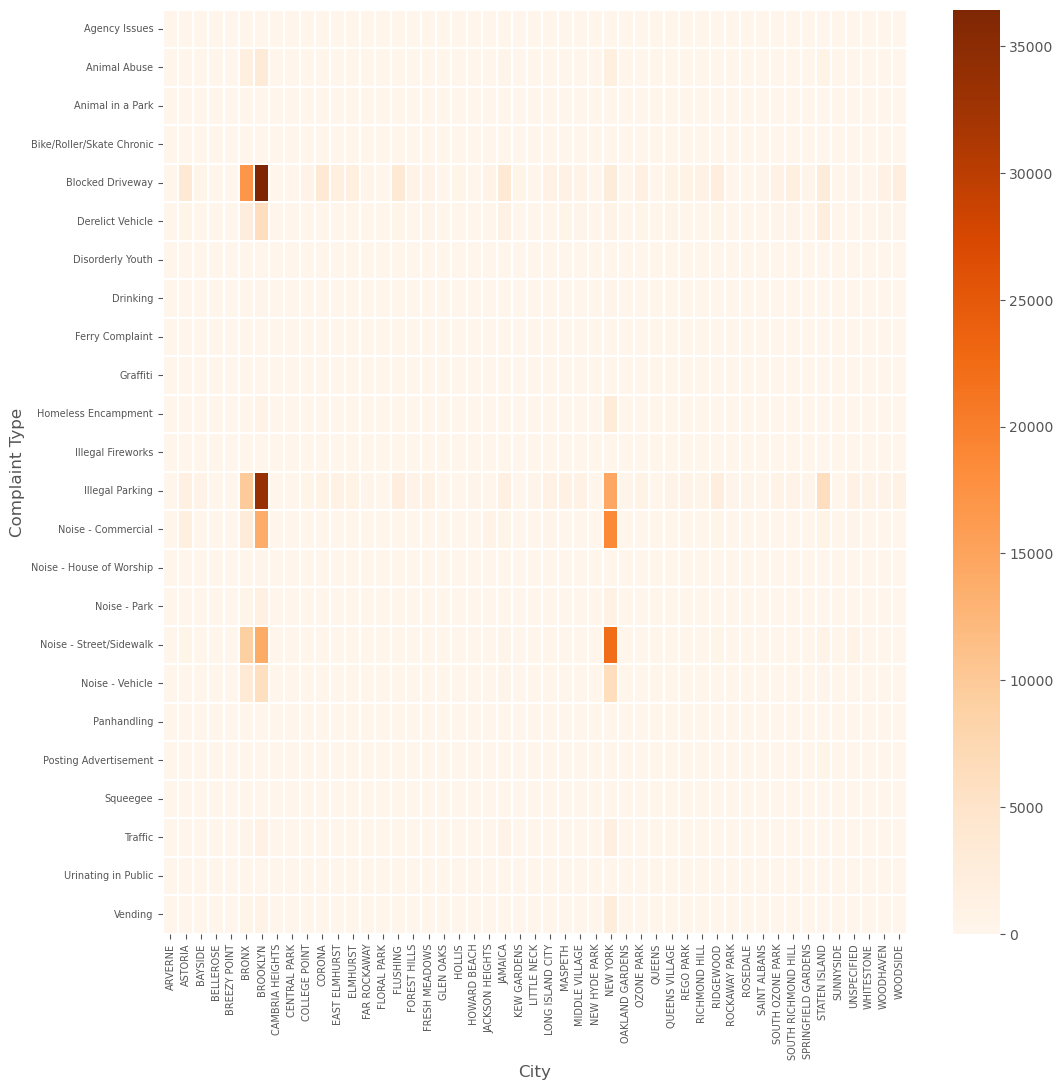

In [26]:
# Analyzing citywise major complaint types using heatmap

plt.style.use('ggplot')
plt.figure(figsize=(12,12))
sns.heatmap(citywise_complaint_type.T, cmap='Oranges', lw=0.1)
plt.grid(visible=True, axis='both')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

Though this is an elegant heatmap, it doesn't really help identify top most type of complaints for each city. A heatmap where colour gradient is applied as per the row/column is required. For this we need to normalize the values by row.

In [27]:
# Normalizing citywise_complaint_type
# NOTE if we are working with ndarray then arr_norm = arr / arr.max(axis=1, keepdims=True)

citywise_complaint_type_normalized = citywise_complaint_type.div(citywise_complaint_type.max(axis=1), axis=0)
citywise_complaint_type_normalized.head()

Complaint Type,Agency Issues,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Ferry Complaint,Graffiti,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,0.0,0.741935,0.0,0.000000,0.806452,0.516129,0.032258,0.016129,0.0,0.016129,...,0.225806,0.032258,0.467742,0.161290,0.016129,0.000000,0.0,0.016129,0.016129,0.016129
ASTORIA,0.0,0.047288,0.0,0.004451,1.000000,0.122392,0.001391,0.011961,0.0,0.001113,...,0.005841,0.017803,0.154103,0.065647,0.000556,0.000834,0.0,0.016690,0.002782,0.015855
BAYSIDE,0.0,0.083072,0.0,0.000000,0.805643,0.362069,0.003135,0.001567,0.0,0.004702,...,0.004702,0.006270,0.026646,0.037618,0.000000,0.000000,0.0,0.014107,0.000000,0.003135
BELLEROSE,0.0,0.108696,0.0,0.007246,1.000000,0.869565,0.014493,0.007246,0.0,0.000000,...,0.007246,0.007246,0.094203,0.079710,0.007246,0.007246,0.0,0.065217,0.007246,0.000000
BREEZY POINT,0.0,0.125000,0.0,0.000000,0.187500,0.187500,0.000000,0.062500,0.0,0.000000,...,0.000000,0.000000,0.062500,0.062500,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5]),
 [Text(0, 0.5, 'Agency Issues'),
  Text(0, 1.5, 'Animal Abuse'),
  Text(0, 2.5, 'Animal in a Park'),
  Text(0, 3.5, 'Bike/Roller/Skate Chronic'),
  Text(0, 4.5, 'Blocked Driveway'),
  Text(0, 5.5, 'Derelict Vehicle'),
  Text(0, 6.5, 'Disorderly Youth'),
  Text(0, 7.5, 'Drinking'),
  Text(0, 8.5, 'Ferry Complaint'),
  Text(0, 9.5, 'Graffiti'),
  Text(0, 10.5, 'Homeless Encampment'),
  Text(0, 11.5, 'Illegal Fireworks'),
  Text(0, 12.5, 'Illegal Parking'),
  Text(0, 13.5, 'Noise - Commercial'),
  Text(0, 14.5, 'Noise - House of Worship'),
  Text(0, 15.5, 'Noise - Park'),
  Text(0, 16.5, 'Noise - Street/Sidewalk'),
  Text(0, 17.5, 'Noise - Vehicle'),
  Text(0, 18.5, 'Panhandling'),
  Text(0, 19.5, 'Posting Advertisement'),
  Text(0, 20.5, 'Squeegee'),
  Text(0, 21.5, 'Traffic'),
  Text(0, 22.5, 'Urinating in Public'),
  T

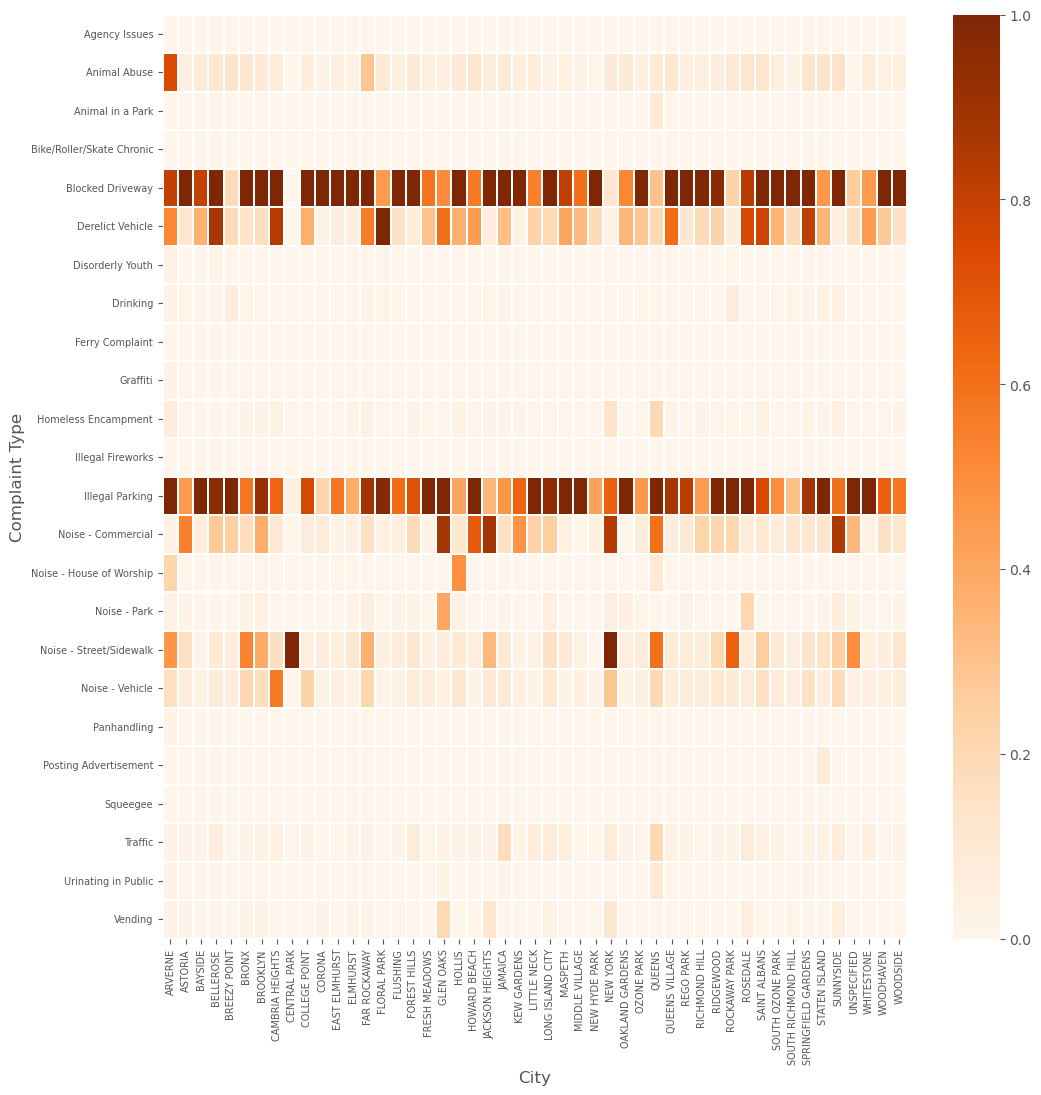

In [28]:
# Plotting scaled version of heatmap. This helps us identify the top complaint types across each city

plt.style.use('ggplot')
plt.figure(figsize=(12,12))
sns.heatmap(citywise_complaint_type_normalized.T, cmap='Oranges', lw=0.1)
plt.grid(visible=True, axis='both')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

In [29]:
# Now, major complaint types by city can be easily identified using heatmap. For instance, the heatmap indicates top three
# complaint types for the city of ARVERNE are Illegal Parking, Blocked Driveway and Animal Abuse. 

# Same can be confirmed via below line of code

citywise_complaint_type.iloc[0,:]

Complaint Type
Agency Issues                 0.0
Animal Abuse                 46.0
Animal in a Park              0.0
Bike/Roller/Skate Chronic     0.0
Blocked Driveway             50.0
Derelict Vehicle             32.0
Disorderly Youth              2.0
Drinking                      1.0
Ferry Complaint               0.0
Graffiti                      1.0
Homeless Encampment           4.0
Illegal Fireworks             0.0
Illegal Parking              62.0
Noise - Commercial            2.0
Noise - House of Worship     14.0
Noise - Park                  2.0
Noise - Street/Sidewalk      29.0
Noise - Vehicle              10.0
Panhandling                   1.0
Posting Advertisement         0.0
Squeegee                      0.0
Traffic                       1.0
Urinating in Public           1.0
Vending                       1.0
Name: ARVERNE, dtype: float64

In [30]:
# Checking count of NaT values in 'Closed Date'

print(csr_311_data['Closed Date'].isna().sum())

2376


   There are 2376 NaT values in the Closed Date column. It's important to understand this is NOT AN ISSUE OF ERRONEOUS DATA. Closed Date column has Null values because for 2376 complaints/requests/service calls the status is either Open, Assigned or Draft. We can confirm the same by below line of code

In [31]:
cd_null_c_index = csr_311_data.loc[(csr_311_data['Closed Date'].isna()) & ((csr_311_data['Status'] == 'Open') | (csr_311_data['Status'] == 'Assigned') | (csr_311_data['Status'] == 'Draft')), :].index
# It returns the index of a df where Closed Date is Null as the status of request is either Open, Assigned or Draft.

print(len(cd_null_c_index))

2376


   It is same as count of 'Closed Date' NaT values. This aligns with the explanation above.

In [32]:
# Computing average request closing time for service requests
# In order to compute average request closing time, first request closing time for each service request/call needs to be computed

request_closing_time = (csr_311_data['Closed Date'] - csr_311_data['Created Date'])
request_closing_time = request_closing_time.apply(lambda x: round(x.total_seconds()/60, 0))
csr_311_data['Request Closing Time (min)'] = request_closing_time

csr_311_data.loc[:10, ['Unique Key', 'Created Date', 'Closed Date', 'Request Closing Time (min)']]

,Unique Key,Created Date,Closed Date,Request Closing Time (min)
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,56.0
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,87.0
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,292.0
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,465.0
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,208.0
5,32306554,2015-12-31 23:56:30,2016-01-01 01:50:11,114.0
6,32306559,2015-12-31 23:55:32,2016-01-01 01:53:54,118.0
7,32307009,2015-12-31 23:54:05,2016-01-01 01:42:54,109.0
8,32308581,2015-12-31 23:53:58,2016-01-01 08:27:32,514.0
9,32308391,2015-12-31 23:53:58,2016-01-01 01:17:40,84.0


In [33]:
# Checking request closing time by complaint type

df = csr_311_data.loc[:, ['Complaint Type', 'Request Closing Time (min)']].groupby(by='Complaint Type').mean().round(1).sort_values('Request Closing Time (min)')
df

,Request Closing Time (min)
Complaint Type,
Posting Advertisement,121.4
Illegal Fireworks,168.6
Noise - Commercial,184.8
Noise - House of Worship,189.9
Noise - Park,203.8
Noise - Street/Sidewalk,203.9
Traffic,205.1
Disorderly Youth,206.1
Noise - Vehicle,209.4


In [34]:
# OR more broader statistics on request closing time can be checked as below

df = csr_311_data.loc[:, ['Complaint Type', 'Request Closing Time (min)']].groupby(by='Complaint Type').describe().round(1)
df

Request Closing Time (min)                           \
                                               count     mean    std      min   
Complaint Type                                                                  
Agency Issues                                    8.0    304.9  222.1     32.0   
Animal Abuse                                 10530.0    300.5  468.5      2.0   
Animal in a Park                                 1.0  20211.0    NaN  20211.0   
Bike/Roller/Skate Chronic                      475.0    218.8  246.8      4.0   
Blocked Driveway                            100624.0    270.5  310.5      3.0   
Derelict Vehicle                             21518.0    422.7  628.0      4.0   
Disorderly Youth                               315.0    206.1  217.5      6.0   
Drinking                                      1404.0    230.4  304.3      5.0   
Ferry Complaint                                  0.0      NaN    NaN      NaN   
Graffiti                                       157.0    387.9  468.2      9.0   
Homeless Encampment                           4879.0    257.5  316.3      6.0   
Illegal Fireworks                              172.0    168.6  215.4      8.0   
Illegal Parking                              91716.0    260.8  340.0      3.0   
Noise - Commercial                           43751.0    184.8  287.5      1.0   
Noise - House of Worship                      1068.0    189.9  260.5      4.0   
Noise - Park                                  4089.0    203.8  239.7      4.0   
Noise - Street/Sidewalk                      51139.0    203.9  320.8      2.0   
Noise - Vehicle                              19301.0    209.4  267.3      2.0   
Panhandling                                    325.0    264.2  545.9      6.0   
Posting Advertisement                          679.0    121.4  151.0      2.0   
Squeegee                                         4.0    242.5  168.6     71.0   
Traffic                                       5196.0    205.1  292.6      4.0   
Urinating in Public                            641.0    216.0  298.9      9.0   
Vending                                       4185.0    239.4  280.7      3.0   

                                                               
                               25%      50%      75%      max  
Complaint Type                                                 
Agency Issues                138.5    294.0    467.5    623.0  
Animal Abuse                  97.0    194.0    372.0  31155.0  
Animal in a Park           20211.0  20211.0  20211.0  20211.0  
Bike/Roller/Skate Chronic     60.5    140.0    293.0   2035.0  
Blocked Driveway              93.0    183.0    343.0   8897.0  
Derelict Vehicle             100.0    240.0    495.0  13402.0  
Disorderly Youth              70.5    141.0    273.0   1683.0  
Drinking                      73.0    154.5    294.2   5686.0  
Ferry Complaint                NaN      NaN      NaN      NaN  
Graffiti                     147.0    251.0    455.0   3277.0  
Homeless Encampment           80.0    168.0    327.5   5479.0  
Illegal Fireworks             34.5     88.5    226.5   1671.0  
Illegal Parking               81.0    172.0    333.0  34641.0  
Noise - Commercial            55.0    122.0    237.0  35232.0  
Noise - House of Worship      50.8    112.5    232.0   2945.0  
Noise - Park                  57.0    132.0    268.0   3461.0  
Noise - Street/Sidewalk       59.0    130.0    255.0  35572.0  
Noise - Vehicle               63.0    135.0    263.0   8847.0  
Panhandling                   73.0    161.0    314.0   8705.0  
Posting Advertisement         30.5     68.0    147.0   1505.0  
Squeegee                     112.2    246.0    376.2    407.0  
Traffic                       46.0    117.0    254.0   4443.0  
Urinating in Public           59.0    126.0    293.0   4871.0  
Vending                       71.0    159.0    317.0   4615.0

<Axes: ylabel='Complaint Type'>

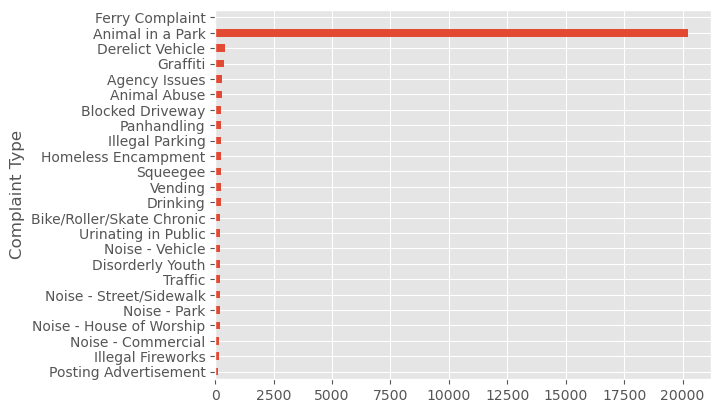

In [35]:
# Plotting the average request closing time by complaint type

df['Request Closing Time (min)']['mean'].sort_values().plot(kind='barh')

Request closing time for 'Ferry Complaint' is not available. The request closing time for 'Animal in a Park' complaint type is significantly higher than the average resolution time for all other complaint types. NOTE, there is only one incidence of 'Animal in a Park' complaint type.

<Axes: ylabel='Complaint Type'>

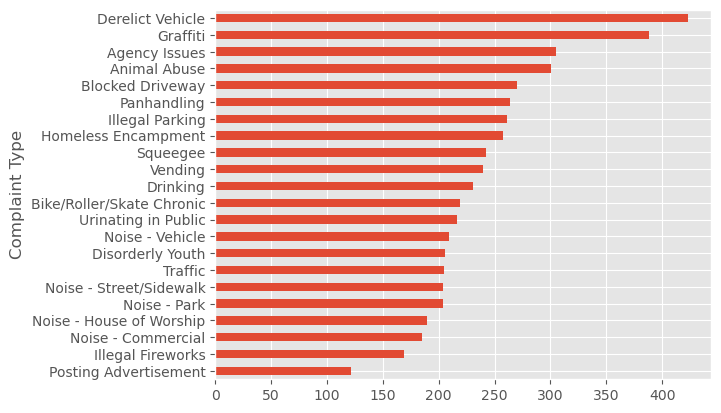

In [36]:
# Plotting the above bar chart excluding the outlier 'Animal in the Park' and 'Ferry Complaint'

df['Request Closing Time (min)']['mean'].sort_values()[:-2].plot(kind='barh')

   The average request closing time varies greatly by various complaint types

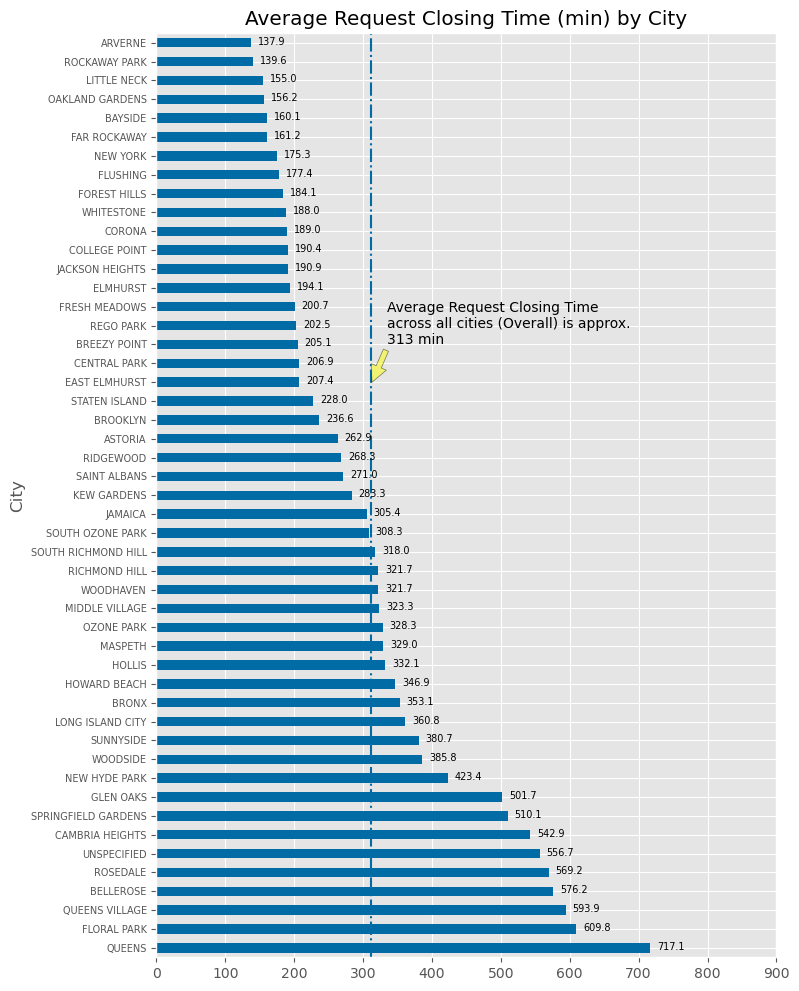

In [37]:
# Plotting best cities in terms of average Request Closing Time

# Step 1 - Calculating average Request Closing Time by City
df = csr_311_data.loc[:,['City', 'Request Closing Time (min)']].groupby(by='City').mean().round(1).sort_values('Request Closing Time (min)', ascending=False)

# Step 2 - Plotting a bar chart to show Average Request Closing Time (min) by each city
plt.style.use('tableau-colorblind10')
df.plot(kind='barh', figsize=(8,12))
plt.yticks(fontsize=7)
for index, value in enumerate(df['Request Closing Time (min)']):
    plt.text(value+10, index-0.1, str(value), fontsize=7)
plt.xlim(0,900)
plt.axvline(df['Request Closing Time (min)'].mean(), ls='-.')
plt.annotate('Average Request Closing Time\nacross all cities (Overall) is approx.\n313 min', xy=(313,30),
             xytext=(335,32), arrowprops={'fc':'yellow', 'ec':'black', 'alpha':0.5})
plt.title('Average Request Closing Time (min) by City')
plt.gca().get_legend().remove()

   The city of Arverne has the best (lowest) Average Request Closing Time of 137.9 minutes. The average Request closing time across all the cities is approximately 313 minutes. The city of Queens has the highest average request closure time of 717.1 minutes

Starting Timestamp: 2015-01-01 00:00:50
Ending Timestamp 2015-12-31 23:59:45


Text(0.5, 1.0, 'Monthly Trend: Number of Calls by Complaint Type')

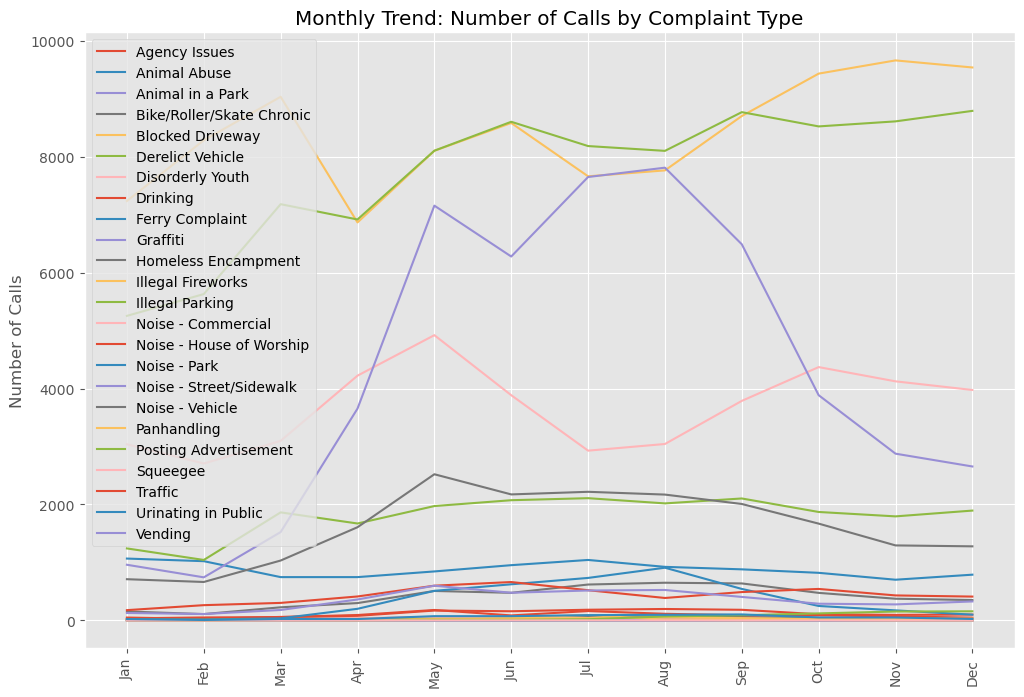

In [38]:
# Checking for variation in number of calls received by month

# All the data is for 2015 only. Check below
print('Starting Timestamp: {}\nEnding Timestamp {}'.format(csr_311_data['Created Date'].min(),csr_311_data['Created Date'].max()))

# Extract month name from the Created Date
csr_311_data['Call_Created_Month'] = csr_311_data['Created Date'].apply(lambda x: x.month)

df = pd.crosstab(csr_311_data['Call_Created_Month'], csr_311_data['Complaint Type'], margins=False)
df.columns.name = None
df.reset_index(inplace=True)

plt.figure(figsize=(12,8))
plt.style.use('ggplot')
plt.plot(df['Call_Created_Month'],df.iloc[:,1:] , label=df.columns[1:])
plt.legend()
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12], labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=90)
plt.ylabel('Number of Calls')
plt.title('Monthly Trend: Number of Calls by Complaint Type')

   For most of complaint types, less than 2000 calls are received per month. Among all the complaint types maximum calls are received for four types - Blocked Driveway, Illegal Parking, Noise-Street/Sidewalk and Noise-Commercial

Text(0.5, 1.0, 'Number of Calls by Complaint Type')

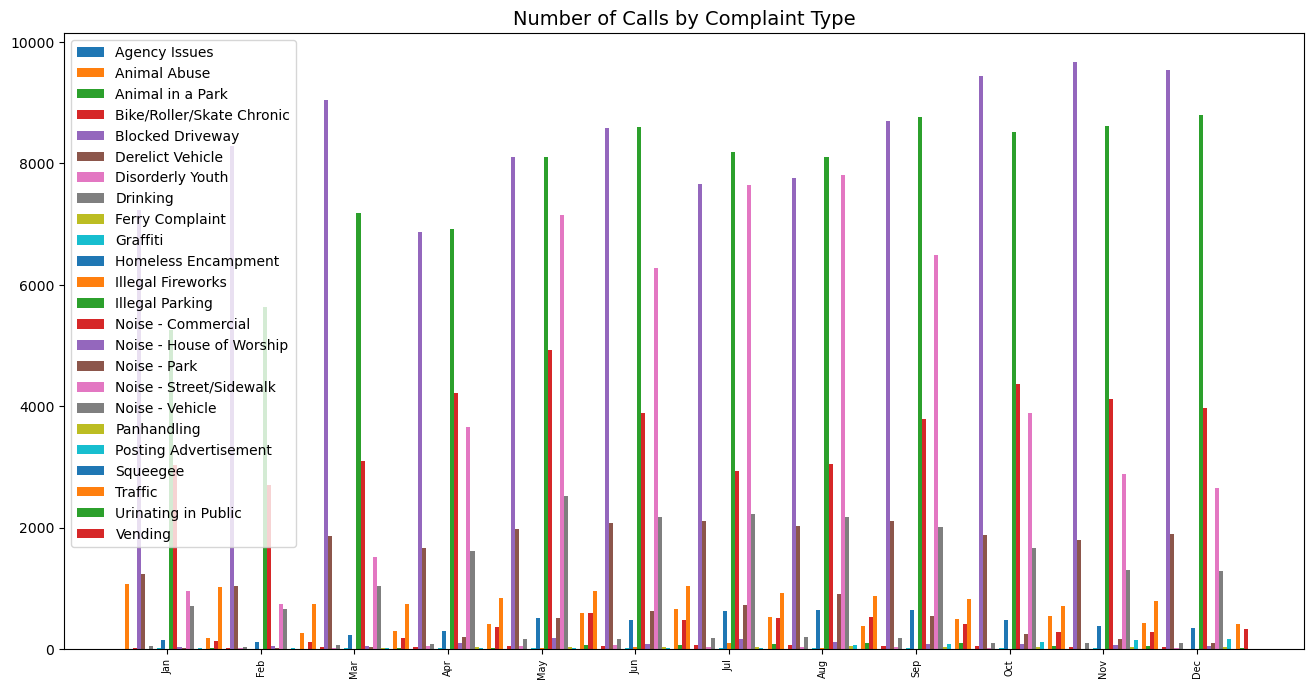

In [39]:
# Above data can be plotted differently in a side-by-side barchart

# Side-by-side bar has each series (column) of a dataframe y of shape (n,m) plotted against a single series dataframe x of
# shape (n,1). From graph creation perspective we will need to convert x into a DataFrame of shape (n,m) i.e. of same shape
# as y. Once done, we then plot ith series of x against ith series of y to generate side-by-side bar. We have defined a
# function to do so which takes x and y dataframes as arguments


def side_by_side_bar(x,y):
    width = np.linspace(-0.5,0.5,len(y.columns))
    width= np.array(width.tolist()*len(x)).reshape(len(x),len(y.columns))
    
    x_mod = x.tolist()*len(y.columns)
    x_mod.sort()
    x = np.array(x_mod).reshape(len(x),len(y.columns))
    x = pd.DataFrame(x + width)
    width = width[0,1]-width[0,0]
    
    plt.rcParams['figure.autolayout'] = True
    for i in range(0,len(y.columns)):
        plt.bar(x[i],y.iloc[:,i],width=width, label=y.columns[i])
        plt.legend()
    plt.xticks(ticks=x.iloc[:,int(len(y.columns)/2-1)])
    return plt.gcf()

plt.style.use('default')
plt.figure(figsize=(16,8))
side_by_side_bar(df['Call_Created_Month'],df.iloc[:,1:])
plt.gca().set_xticklabels(labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=90, fontsize=7)
plt.title('Number of Calls by Complaint Type', fontsize=14)

   Both the line plot and side_by_side_bar plot are cluttered and difficult to read. Moreover to generate side_by_side barplot in Matplotlib require multiple lines of code. Such plots are generated more easily and made interactive by using other visualization libraries such as plotly.

<Axes: xlabel='Location Type', ylabel='Complaint Type'>

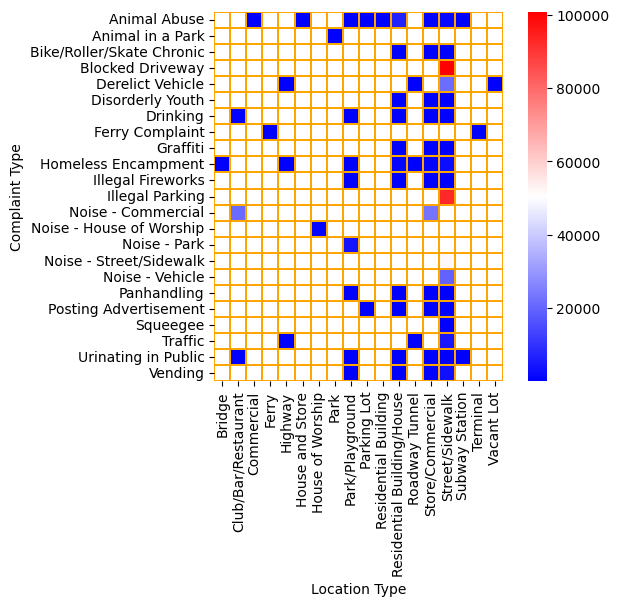

In [40]:
# Check locations generating most of the calls

data = pd.crosstab(csr_311_data['Complaint Type'],csr_311_data['Location Type'])
mask = data.values==0
plt.style.use('default')
sns.heatmap(data=data, cmap='bwr', mask=mask, square=True, linewidths=0.01, linecolor='Orange')

   Street/Sidewalk, Store/Commercial and Residential Building/House are the top three location types generating most type of complaints. Hence response teams should stay close to these location types in order to improve the response time.

In [41]:
# Display complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

# Note the below code output is very close to the expected output, except that the values are not ordered/sorted within a
# Location Type.

df = csr_311_data.groupby(['Location Type','Complaint Type']).mean('Request Closing Time (min)').round(1)
df['Request Closing Time (min)']

Location Type        Complaint Type     
Bridge               Homeless Encampment    229.5
Club/Bar/Restaurant  Drinking               261.4
                     Noise - Commercial     181.5
                     Urinating in Public    426.1
Commercial           Animal Abuse           270.7
                                            ...  
Street/Sidewalk      Vending                239.7
Subway Station       Animal Abuse           184.0
                     Urinating in Public     72.9
Terminal             Ferry Complaint          NaN
Vacant Lot           Derelict Vehicle       404.5
Name: Request Closing Time (min), Length: 71, dtype: float64

   In order to sort 'Average Request Closing Time (min)' within a Location Type by Complaint Type, we need to use groupby on a dataframe which is already grouped by 'Location Type' and 'Complaint Type'. The second groupby allows for passing one group at a time as an element to the apply function. The sort_values() then sorts the values within that group. Without using the second groupby, there is no way to pass each group as a series element to apply() func.

In [42]:
# Below code generates the required output

df = csr_311_data.groupby(['Location Type','Complaint Type']).mean('Request Closing Time (min)').round(1)
df = df['Request Closing Time (min)'].groupby('Location Type', group_keys=False).apply(lambda x: x.sort_values(ascending=True))
df.name = 'Average Request Closing Time (min)'
print(df)

Location Type        Complaint Type     
Bridge               Homeless Encampment    229.5
Club/Bar/Restaurant  Noise - Commercial     181.5
                     Drinking               261.4
                     Urinating in Public    426.1
Commercial           Animal Abuse           270.7
                                            ...  
Street/Sidewalk      Graffiti               596.8
Subway Station       Urinating in Public     72.9
                     Animal Abuse           184.0
Terminal             Ferry Complaint          NaN
Vacant Lot           Derelict Vehicle       404.5
Name: Average Request Closing Time (min), Length: 71, dtype: float64


### Statistical Testing

   Statistically checking average response time across complaint types is similar or not (overall)

   H0 : The averge response time across complaint types is similar i.e. 
   H0 : Mu0 = Mu1 ..... = Mui ...... = Mu22 = Mu23

   Where Mui is the average response time for ith complaint type


   H1 : Average response time for at least one complaint type is significantly different from other groups i.e.
   H1 : All Mu are not equal

   We have one independent factor Complaint Type with 24 levels and one continous dependent variable (Request Closing Time). To check if the variation in averge response time across complaint types is significant or not, we will perform one-way ANOVA (F-test or omnibus test).

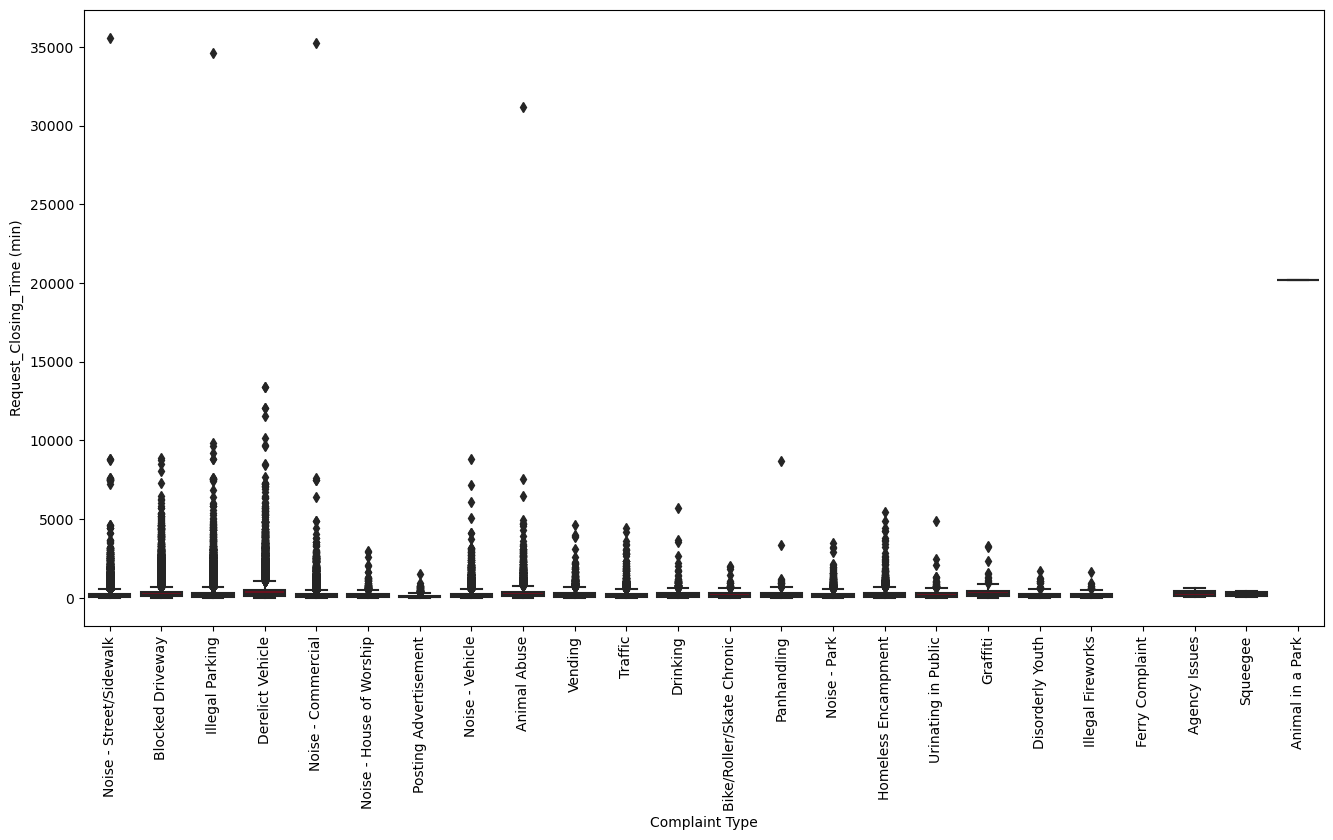

In [43]:
df_melt = pd.melt(csr_311_data, id_vars='Complaint Type', value_vars='Request Closing Time (min)', value_name='Request_Closing_Time (min)')

# pd.melt() is to reshape the dataframe from wide to long format. Here always the dataframe has three columns - identifier,
# variable and value.

plt.figure(figsize = (16,8))
ax = sns.boxplot(x='Complaint Type', y='Request_Closing_Time (min)', data=df_melt, color='#7d0013')
ax.tick_params(axis='x',labelrotation = 90, labelsize=10)

   Ploting a boxplot helps visualize the variance in the mean/ average value of the variable. Here we can observe that every complaint type has several outlier values for the Request Closing Time (min).

In [44]:
# Formatting data into appropriate format for one-way ANOVA test

df = csr_311_data[['Complaint Type', 'Request Closing Time (min)']]
factor_levels = []
for i in df['Complaint Type'].unique():
    s = df[df['Complaint Type']==i]
    s = pd.DataFrame(data=s['Request Closing Time (min)'].values, columns=[i])
    factor_levels.append(s)
df = pd.concat(factor_levels,axis=1)

   Different complaint types have different number of records/ rows in the dataset. This means the sample size for each Complaint Type is different. Sample size (i.e. Non-Null values) for each Complaint Type can be checked using below line of code. When we concatenated various factors above to generate df multiple NaN values were introduced in the dataset.

In [45]:
# Check the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100880 entries, 0 to 100879
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Noise - Street/Sidewalk    51139 non-null   float64
 1   Blocked Driveway           100624 non-null  float64
 2   Illegal Parking            91716 non-null   float64
 3   Derelict Vehicle           21518 non-null   float64
 4   Noise - Commercial         43751 non-null   float64
 5   Noise - House of Worship   1068 non-null    float64
 6   Posting Advertisement      679 non-null     float64
 7   Noise - Vehicle            19301 non-null   float64
 8   Animal Abuse               10530 non-null   float64
 9   Vending                    4185 non-null    float64
 10  Traffic                    5196 non-null    float64
 11  Drinking                   1404 non-null    float64
 12  Bike/Roller/Skate Chronic  475 non-null     float64
 13  Panhandling                32

ANOVA COMPUTATION - Missing Value Treatment APPROACH 1 - Remove all missing values

   We need to deal with NaN/ Null values before performing F-test on the dataset. ANOVA is about checking the variance within and between different level of the independent variable (factor). In this case, variance of 'Request Closing Time (min)' within and between different types of complaints. Our stragety to fill NaN values should be such that:
        # Mean Request Closing Time (min) remains unchanged for each complaint type
        # Variance of Request Closing Time (min) within each complaint type remains unchanged
        # Variance of Request Closing Time (min) between different complaint type remains unchanged

One way is: Drop complaint types - Ferry Complaint, Agency Issues, Squeegee and Animal in a Park, as these have very few records
in the dataset. Next drop all rows with any Null/NaN values. This will result in a dataframe with much fewer rows.
    
This can be performed using below lines of code. After removing all NaNs, we should check for the shape.  

In [46]:
df1 = df.drop(['Ferry Complaint', 'Agency Issues', 'Squeegee', 'Animal in a Park'], axis=1)
df1.dropna(axis=0, how='any', inplace=True)
print('After removing all Null values, the dataset has {} rows and {} columns.'.format(df1.shape[0],df1.shape[1]))
print('\n')

After removing all Null values, the dataset has 146 rows and 20 columns.




In [47]:
# Assigning each column of the dataframe (i.e. each Complaint Type) to a separate variable

a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r, s, t = list(df1.T.values)

# f-statistics and p-value computation 

import scipy.stats as stats

# stats f_oneway functions takes the groups as input and returns ANOVA F and p value

fvalue, pvalue = stats.f_oneway(a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r, s, t)
print('The f-statistics is {}\nThe pvalue is {}'.format(fvalue, pvalue))
print('\n')
print("The pvalue till the eleventh decimal place is {}".format(round(pvalue,11)))

The f-statistics is 5.296539488864007
The pvalue is 7.422797016827131e-13


The pvalue till the eleventh decimal place is 0.0


ANOVA COMPUTATION - Missing Value Treament - APPROACH 2 - Replace all missing values with respective column means.

The impact of replacing NaN values in this way will be minimal on the mean and variance of the dataset.

In [48]:
# Filling all NaNs with their respective column means. 

for i in df:
    df2 = df.fillna(df.mean())

# In this approach we will drop only one column 'Ferry Complaint' as all values for this complaint type are null. Hence the
# mean value for the column is also Null.
    
df2.drop('Ferry Complaint', axis=1, inplace=True)
df2.isna().sum()

# Assigning each column of the dataframe (i.e. each Complaint Type) to a separate variable
a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r, s, t, u, v, w = list(df2.T.values)

# f-statistics and p-value computation 

import scipy.stats as stats

# stats f_oneway functions takes the groups as input and returns ANOVA F and p value

fvalue, pvalue = stats.f_oneway(a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r, s, t, u, v, w)
print('The f-statistics is {}\nThe pvalue is {}'.format(fvalue, pvalue))

The f-statistics is 93720727.7115726
The pvalue is 0.0


#### CONCLUSION - ANOVA (F-TEST):
- Using both approach 1 and approach 2, the pvalue is practically 0.0.
- As pvalue obtained from ANOVA analysis is significnat (pvalue < level of significance (0.05)), we reject the Null Hypothesis.
- There is significant difference between the average Request Closing Time (min) for different complaint types.
- NOTE that F-value is inversely proportional to pvalue. A higher F-value indicates a significant pvalue

#### Check service requested and location are related

Complaint Type and Location Type are two categorical (nominal) variables. We need to check whether the Complaint Type is related to Location Type or not. This can be done using Chi-square test of independence. Therefore our null and alternate hypothesis will be:
- H0 : The Complaint Type and the Location Type are independent of (no association with) each other
- H1 : Complaint Type and Location Type variables are dependent on each other i.e. there is an association.

Chi-square test relies on approximation (gives approximate p value) and hence require large sample size. The expected frequency count shouldn't be <5 for more than 20% of cell.

In [49]:
from scipy.stats import chi2_contingency

observed = pd.crosstab(csr_311_data['Complaint Type'], csr_311_data['Location Type'], margins=True)
observed

Location Type,Bridge,Club/Bar/Restaurant,Commercial,Ferry,Highway,House and Store,House of Worship,Park,Park/Playground,Parking Lot,Residential Building,Residential Building/House,Roadway Tunnel,Store/Commercial,Street/Sidewalk,Subway Station,Terminal,Vacant Lot,All
Complaint Type,,,,,,,,,,,,,,,,,,,
Animal Abuse,0,0,108,0,0,245,0,0,144,160,533,6727,0,717,1878,26,0,0,10538
Animal in a Park,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
Bike/Roller/Skate Chronic,0,0,0,0,0,0,0,0,0,0,0,32,0,60,386,0,0,0,478
Blocked Driveway,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100843,0,0,0,100843
Derelict Vehicle,0,0,0,0,19,0,0,0,0,0,0,0,8,0,21531,0,0,95,21653
Disorderly Youth,0,0,0,0,0,0,0,0,0,0,0,93,0,10,212,0,0,0,315
Drinking,0,458,0,0,0,0,0,0,99,0,0,298,0,96,457,0,0,0,1408
Ferry Complaint,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2
Graffiti,0,0,0,0,0,0,0,0,0,0,0,73,0,51,33,0,0,0,157


Examining the contingency table (observed frequencies) it is clear that for large majority of cells the observed frequency count is 0. Further if we look at row_totals and column_totals, it is clear a number of rows
and columns have small total value. This inturn means, more than 20% of the cells will have expected frequency less than 5. And
Chi-square test will likely be inaccurate or less dependable.

In [50]:
# Performing Chi-square test are demonstrated below:

# Chi-square corrected for Yate's continuity
chi_value, p_value, dof, expected = chi2_contingency(observed.iloc[:-1,:-1].values)

# Chi-square without correction
chi_value, p_value, dof, expected = chi2_contingency(observed.iloc[:-1,:-1].values, correction=False)

print("The p value from the chi-square test is {}.".format(p_value))
print('\n')
print('The expected frequency table is\n\n{}'.format(expected))

The p value from the chi-square test is 0.0.


The expected frequency table is

[[5.78343669e-02 6.22471291e+02 3.12305581e+00 2.89171835e-02
  7.66305362e+00 7.08470995e+00 3.08835519e+01 2.89171835e-02
  1.40826683e+02 4.82916964e+00 1.54128588e+01 2.56466500e+02
  1.24343889e+00 7.29204616e+02 8.71474267e+03 1.15668734e+00
  2.89171835e-02 2.74713243e+00]
 [5.48817299e-06 5.90692059e-02 2.96361341e-04 2.74408649e-06
  7.27182921e-04 6.72301191e-04 2.93068438e-03 2.74408649e-06
  1.33637012e-02 4.58262444e-04 1.46259810e-03 2.43373031e-02
  1.17995719e-04 6.91976291e-02 8.26982602e-01 1.09763460e-04
  2.74408649e-06 2.60688217e-04]
 [2.62334669e-03 2.82350804e+01 1.41660721e-01 1.31167334e-03
  3.47593436e-01 3.21359969e-01 1.40086713e+00 1.31167334e-03
  6.38784919e+00 2.19049448e-01 6.99121892e-01 1.16332309e+01
  5.64019538e-02 3.30764667e+01 3.95297684e+02 5.24669338e-02
  1.31167334e-03 1.24608968e-01]
 [5.53443829e-01 5.95671593e+03 2.98859667e+01 2.76721914e-01
  7.33313073e+0

#### CONCLUSION - Chi-square Test
The p value obtained from Chi-square test of independence is significant (p < 0.05). Hence we reject the Null hypothesis.
We conclude that there is significant association between Complaint Type and Location Type.

### Feature selection - 
#### Feature selection is about identifying, selecting and creating significant variables for model training. Multiple techniques are used for feature selection.

Using chi-square test for feature selection. We will take a slice of original dataframe/dataset containing few selected categorical variables and will ignore categorical variables with very large number of levels. This is being done to keep chi-square test results meaningful. Considering all variables with large number of levels will make the crosstabulation (i.e. observed frequency calculations) unmanageable with observable frequencies extremely low.

In [51]:
df = csr_311_data[['Agency Name','Complaint Type','Location Type','City','Status','Borough']]

# Checking for null values and droping any row containing Null Values
print(df.isna().sum())
df.dropna(axis=0, how='any', inplace=True)

# Label encoding all values of different Categorical variables (prepratory step for Chi-Square test)

from sklearn.preprocessing import LabelEncoder
 
label_encoder = LabelEncoder()
for i in df.columns:
    df[i] = label_encoder.fit_transform(df[i])
print(df.head())

Agency Name         0
Complaint Type      0
Location Type     133
City                0
Status              0
Borough             0
dtype: int64


/tmp/ipykernel_17887/527866455.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0, how='any', inplace=True)
/tmp/ipykernel_17887/527866455.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = label_encoder.fit_transform(df[i])
/tmp/ipykernel_17887/527866455.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

   Agency Name  Complaint Type  Location Type  City  Status  Borough
0            1              15             14    29       1        2
1            1               3             14     1       1        3
2            1               3             14     5       1        0
3            1              11             14     5       1        0
4            1              11             14    12       1        3


/tmp/ipykernel_17887/527866455.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = label_encoder.fit_transform(df[i])


In [52]:
# Implementing the chi-square test for feature selection

# To demonstrate chi-square test for feature selection assumming 'Status' is the response variable and other categorical 
# variables are predictors

from sklearn.feature_selection import chi2
X = df.drop('Status', axis=1)
y = df['Status']
chi_scores = chi2(X,y)
print(type(chi_scores))
print(chi_scores)

<class 'tuple'>
(array([1.29764960e-03, 7.01631174e+02, 2.75963591e+01, 9.93751465e+04,
       1.32083532e+04]), array([9.99987572e-001, 9.29690948e-152, 4.41420137e-006, 0.00000000e+000,
       0.00000000e+000]))


<Axes: >

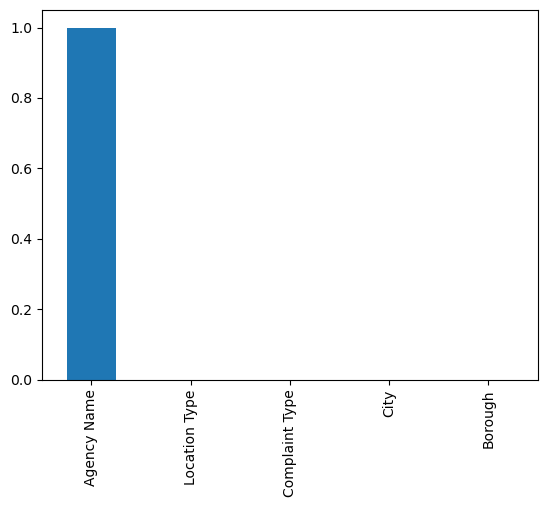

In [53]:
# Output is two arrays. The first array is of chi-square values and second array is of p values. Plotting p values to identify
# significant variables for model training. 

p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

p_values.plot.bar()

##### CONCLUSION

As the p value for 'Agency Name' is high, we conclude there is little association between 'Agency Name' and 'Status'. In other words, 'Agency Name' is not a significant variable to predict the Status. While other categorical variable are significant for predicting Status

#### ------------------------------------------------------------------------------- End of Project -----------------------------------------------------------------------------